In [108]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [102]:
print(torch.__version__)

2.2.0.post100


In [103]:
class LogisticRegress(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear(x)
        return self.sigmoid(out)

In [54]:
model = LogisticRegress(2,1)

In [91]:
ITERATIONS = 100
LR = 0.5

In [97]:
x = torch.tensor([[0,0],[0,1],[1,0], [1,1]]).type(torch.float32)
y = torch.tensor([[0],[1],[1],[1]]).type(torch.float32)

for p in model.parameters():
    p.requires_grad = True

costs = []
sgd = torch.optim.SGD(model.parameters(), lr=LR)
for i in range(ITERATIONS):
    pred = model(x)
    cost = F.binary_cross_entropy(pred, y)
    costs.append(cost.item())
    model.zero_grad(set_to_none=True)
    cost.backward()
    '''for p in model.parameters():
        p.data += -LR * p.grad
    Use optimizer update way instead of manually defining the update
    '''
    sgd.step()

In [100]:
print("Final cost: ", costs[-1])

Final cost:  0.07105867564678192


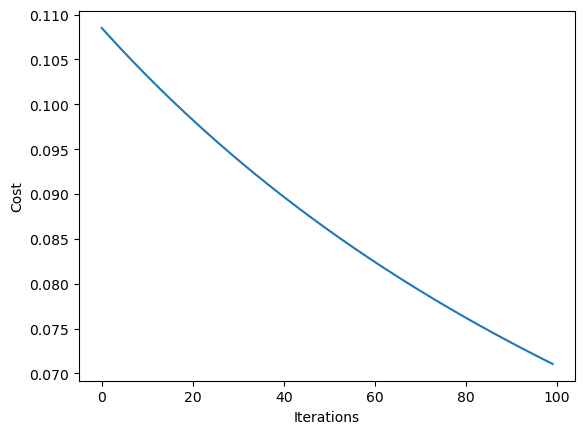

In [110]:
plt.plot(np.arange(0, ITERATIONS), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [99]:
final_prediction = model(x)
print(final_prediction)

tensor([[0.1494],
        [0.9408],
        [0.9421],
        [0.9993]], grad_fn=<SigmoidBackward0>)
